<a href="https://colab.research.google.com/github/shuvopodder/Plant-Disease-Prediction/blob/main/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/images/cnn

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd 'My Drive'

/gdrive/My Drive


In [ ]:
#switch to folder
%cd 'Plant Disease'

/gdrive/My Drive/Plant Disease


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [ ]:
dir_path = "./data"

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory("./data/train/",target_size=(200,200),
                                         batch_size = 2,
                                         class_mode='binary')
val_dataset = train.flow_from_directory("./data/val/",target_size=(200,200),
                                         batch_size = 2,
                                         class_mode='binary')

Found 3723 images belonging to 5 classes.
Found 784 images belonging to 5 classes.


In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#history = model.fit(train_images, train_labels, epochs=10, 
                    #validation_data=(test_images, test_labels))

model_fit = model.fit(train_dataset,steps_per_epoch=50,epochs=10,
                     validation_data =  val_dataset)

Epoch 1/10
50/50 [==============================] - 120s 2s/step - loss: 1.2225 - accuracy: 0.5555 - val_loss: 1.3293 - val_accuracy: 0.3941
Epoch 2/10
50/50 [==============================] - 30s 601ms/step - loss: 1.1218 - accuracy: 0.5570 - val_loss: 1.1649 - val_accuracy: 0.5370
Epoch 3/10
50/50 [==============================] - 29s 587ms/step - loss: 1.2385 - accuracy: 0.5190 - val_loss: 1.5759 - val_accuracy: 0.1977
Epoch 4/10
50/50 [==============================] - 28s 569ms/step - loss: 1.3920 - accuracy: 0.4091 - val_loss: 1.1233 - val_accuracy: 0.4732
Epoch 5/10
50/50 [==============================] - 28s 556ms/step - loss: 1.1583 - accuracy: 0.4983 - val_loss: 1.1125 - val_accuracy: 0.4694
Epoch 6/10
50/50 [==============================] - 29s 573ms/step - loss: 1.2721 - accuracy: 0.4525 - val_loss: 1.1269 - val_accuracy: 0.4694
Epoch 7/10
50/50 [==============================] - 26s 534ms/step - loss: 1.0653 - accuracy: 0.6470 - val_loss: 1.1127 - val_accuracy: 0.4681
E

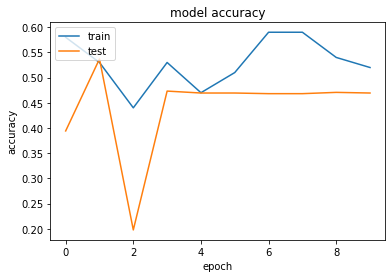

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

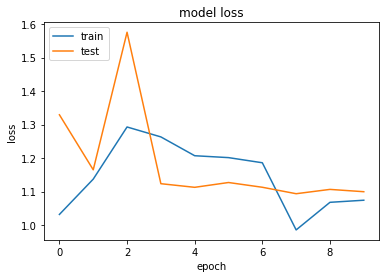

In [ ]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import load_model
import tensorflow as tf
model = load_model("model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

print("model converted")

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpmkfhe_xx/assets
model converted


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt


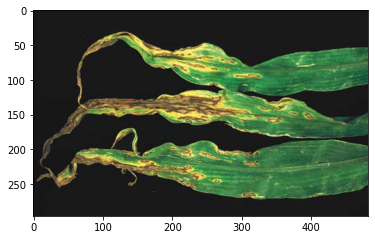

In [ ]:
s = image.load_img("./data/train/Blight/Corn_Blight (5).jpg")
plt.imshow(s)

In [ ]:
import numpy as np
import tensorflow as tf
import cv2

img = cv2.imread("./data/train/Blight/Corn_Blight (5).jpg")
img = cv2.resize(img, (200,200))
img = np.array(img, dtype="float32")
img = np.reshape(img, (1,200,200,3))

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']

print("*"*50, input_details)
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

************************************************** [{'name': 'conv2d_input', 'index': 0, 'shape': array([  1, 200, 200,   3], dtype=int32), 'shape_signature': array([ -1, 200, 200,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[ 0.44147912 -1.2921419   0.3071108  -0.22617769  0.9221531 ]]
